In [110]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from micromlgen import port
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [111]:
# import dataset dari CSV menjadi dataframe pandas

df = pd.read_csv('dataset.csv')
print(df.head())
print(df.info())

   red  green  blue  weigth  length  jenis
0   14     23    33   51.11   10.35      1
1   60     96   153   53.97   11.45      0
2   38     64   104   53.11   10.54      0
3   11     16    28   45.32   10.90      0
4   26     43    64   61.72   11.19      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   red     27 non-null     int64  
 1   green   27 non-null     int64  
 2   blue    27 non-null     int64  
 3   weigth  27 non-null     float64
 4   length  27 non-null     float64
 5   jenis   27 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.4 KB
None


In [112]:
# memisahkan dataset atribut dan label

NUM_OF_FEATURES = 5
X = df[df.columns[:NUM_OF_FEATURES]]
y = df['jenis']

In [113]:
print(X)

    red  green  blue  weigth  length
0    14     23    33   51.11   10.35
1    60     96   153   53.97   11.45
2    38     64   104   53.11   10.54
3    11     16    28   45.32   10.90
4    26     43    64   61.72   11.19
5    10     15    27   44.05   11.14
6    28     46    68   53.20   11.30
7    24     40    64   45.32   10.38
8    33     53    93   49.72   10.90
9    10     15    26   54.82   11.24
10   20     32    55   51.44   11.00
11   36     63    95   42.86    9.49
12   33     56    89   55.05   10.54
13   18     29    43   63.94    9.78
14   18     28    40   47.50    9.88
15   13     22    32   50.40    9.12
16   14     23    34   55.50   10.64
17   16     28    40   43.99    9.59
18   13     20    33   57.00   10.47
19   13     20    28   50.93    9.83
20   17     29    40   60.17    9.54
21   13     22    33   56.77   10.43
22   13     20    34   54.11    9.33
23   18     29    43   46.98    9.33
24   11     18    29   57.12    9.95
25   13     20    30   55.15   10.59
2

In [114]:
# standardisasi nilai-nilai dataset

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [115]:
# print mean dan std. deviasi untuk standardisasi di alat

for i in scaler.mean_:
    print(f'{i}, ', end='')
print()
for i in scaler.scale_:
    print(f'{i}, ', end='')

20.51851851851852, 33.55555555555556, 52.22222222222222, 52.22851851851852, 10.306666666666665, 
11.209686189714647, 18.714884813437855, 30.15187892104132, 5.41559319530783, 0.6920393908720215, 

In [116]:
# melihat variansi dari setiap atribut

pca = PCA(n_components=NUM_OF_FEATURES)
pca.fit(X)
pca.explained_variance_ratio_

array([6.21507193e-01, 2.22005625e-01, 1.54842411e-01, 1.22728809e-03,
       4.17483233e-04])

In [117]:
# reduksi dimensi dengan PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)
print(X)
pca.explained_variance_ratio_

[[-0.98578776  0.00773354]
 [ 6.10824565 -0.46107163]
 [ 2.83132488  0.02822752]
 [-1.24690063  0.38111999]
 [ 1.05352199 -2.05082069]
 [-1.26399756  0.36752071]
 [ 1.36981418 -0.81592939]
 [ 0.62402264  1.06168346]
 [ 2.17092603  0.1489402 ]
 [-1.26851932 -1.34627342]
 [ 0.2102873  -0.44384394]
 [ 2.20323968  2.39216514]
 [ 2.0573642  -0.36282749]
 [-0.62999295 -1.40353829]
 [-0.65390415  0.99388683]
 [-1.4906149   1.0956528 ]
 [-0.87880871 -0.88881957]
 [-0.84416406  1.74863065]
 [-1.09636701 -1.00016557]
 [-1.39100216  0.42427876]
 [-0.8090739  -0.6510973 ]
 [-1.04937909 -0.92388134]
 [-1.45007633  0.35969481]
 [-0.74914968  1.52779589]
 [-1.50372138 -0.62761762]
 [-1.10941782 -0.8235906 ]
 [-0.20786915  1.26214653]]


array([0.62150719, 0.22200562])

In [118]:
# mencari hyperparameter terbaik untuk model SVM menggunakan GridSearchCV

strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svc = SVC()
clf = GridSearchCV(svc, {'kernel':('linear', 'poly', 'sigmoid', 'rbf'),
                         'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001]},
                   cv=strat_k_fold)
clf.fit(X, y)

print(clf.best_estimator_)
scores = cross_val_score(clf.best_estimator_, X, y, cv=strat_k_fold)
print(f"Accuracy: {scores.mean()*100:0.2f}%")

SVC(C=0.1, gamma=0.001, kernel='linear')
Accuracy: 82.67%


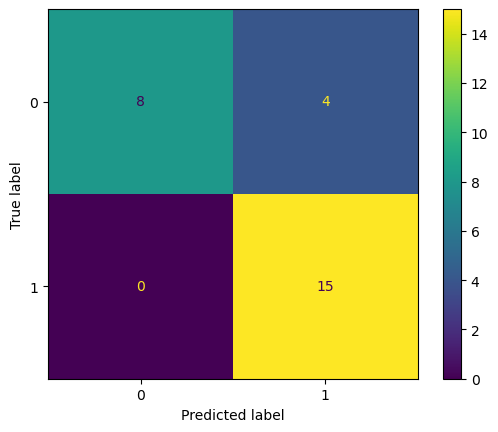

In [119]:
predictions = clf.best_estimator_.predict(X)
cm = confusion_matrix(y, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

In [120]:
# port PCA dan SVM ke C++

with open('pca.h', 'w') as f:
    f.write(port(pca))

with open('svm.h', 'w') as f:
    f.write(port(clf.best_estimator_, classmap={0: 'susu',
                                                1: 'berlin'}))